<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2020 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

**Temas**  

* Arquitectura Básica de Redes Neuronales. Redes *Feed-Forward*
* Entrenamiento de Redes Neuronales. 
* Redes Convolucionales. 

**Formalidades**  
* Equipos de trabajo de: 3 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Formato de entrega: envı́o de link Github y link de video Youtube o plataforma a convenir, todo esto vía Aula. 

<hr style="height:2px;border:none"/>

### **Propuesta**
* Se debe preparar una presentación de **15 a 20 minutos** donde se explique el cómo se va a realizar/resolver el taller, la metodología o propuesta de las componentes a experimentar y explorar. Más detalles en el Syllabus.
* Fecha de encuentro Zoom: 8 de Mayo en horario de clases.
* Fecha de entrega de vídeo: Opcional para quienes presentaron y obligatorio para quienes no, a lo más 2 días después del encuentro.
* Modalidad de Presentación (Zoom): En el primer bloque, se formarán 3 grupos para que alcancen a recibir feedback todos los equipos. En el segundo bloque, algunos equipos seleccionados presentarán a todo el curso. 

**Aún si la idea es aprender colaborativamente, valoraremos mucho la diversidad de ideas, por lo que las propuesta debiesen conservar su orientación inicial, excepto por el feedback que les entreguemos**

### **Defensa**
* Se debe preparar una presentación de **15 a 20 minutos** con los resultados obtenidos y conclusiones de la experiencia. 
* Se debe entregar el código, de preferencia en un (breve) Jupyter/IPython notebook, de modo que **permita reproducir los resultados** presentados. Si se entrega el código fuente se deben proveer instrucciones para su uso.
* Fecha de encuentro Zoom: 29 de Mayo, horario de clases.
* Fecha de entrega de vídeo: 27 de Mayo (2 días antes de encuentro).
* Fecha de entrega de Jypter (notebook): 27 de Mayo (commits hasta el 29 de Mayo en horario de clases). 
* Modalidad de Presentación (Zoom): En ambos bloques algunos equipos seleccionados presentarán ante todo el curso, discusión y debate se generará en base a los resultados.

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Pregunta Libre   
[2.](#segundo) Challenge Kaggle


#### <a id="primero"></a>
## 1. Pregunta Libre

Refute o evidencie experimentalmente una de las siguientes afirmaciones 

> **1. Rol de la Profundidad**: Si se toma una arquitectura base cualquiera, $A$, de red neuronal y se añade una capa, $A^{+1}$, siempre se mejorará la tarea objetivo en el conjunto de entrenamiento, validación y pruebas. Eso no depende de la forma de entrenar.

R: ¿Que pasa si agrego capas con una neurona?

> **2. Teorema de approx. universal**: Una arquitectura de red neuronal tiene la capacidad de aproximar cualquier función y esto es independiente del número de neuronas o capas.

R: El detalle, es que la red neuronal tiene la capacidad de aproximar solo funciones **continuas**

> **3. Rol de la Profundidad**: Si se toma una arquitectura base $A$ con $n$ neuronas y $L$ capas, y se redistribuyen las neuronas aumentando $L$, será posible aprender mejor y más rápido la tarea. 

R:

> **4. Convergencia**: Con la suficiente cantidad de iteraciones, una red neuronal siempre podrá converger algun mínimo local. El tiempo que tarda es independiente de la tasa de aprendizaje y el tamaño de batch.

> **5. Convergencia (2)**: La velocidad de aprendizaje es independiente de la función de activación que se utilice en las capas ocultas y del número de ejemplos de entrenamiento. 

> **6. Approx universal y tolerancia a ruido**: Una red neuronal tiene la capacidad de aprender en el conjunto entrenado, incluso si el *target* (objetivo de la tarea) es aleatorio. Si el porcentaje de etiquetas corruptas  (por ejemplo con un *shift* o *shuffle* sobre $y$) es pequeño, la red aprende la tarea correcta.

> **7. Arquitectura y parámetros de CNN**: Una red convolucional siempre tendrá menor cantidad de parámetros que una red *Feed Forward*, por ende, su desempeño en la tarea estará limitado.

> **8. Ventajas de una CNN**: En cualquier problema que se tenga estructura espacial (uni-dimensional como texto o bi-dimensional como imágenes), una red neuronal con arquitectura convolucional será la más **adecuada** para resolverlo.

> **9. Aplicaciones de una CNN**: No resulta ventajoso aplicar una red con arquitectura convolucional en problemas de regresión. 

> **10. Aplicaciones de una NN**: Las redes neuroanles no se aplican correctamente a problemas multi-label.

> **11. Limitaciones de una NN**: El desbalanceo de las clases no tiene ningún efecto en el entrenamiento de la red.

**Reglas mínimas**: Validar en al menos 1 dataset sintético y 2 reales.


## XOR Example

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np

size_train = 100000
size_test = 200

# Create pair of numbers (a, b)
a = np.random.randint(0,2,size_train)[:,np.newaxis]
b = np.random.randint(0,2,size_train)[:,np.newaxis]
# Label of xor, between a and b 
y = np.logical_xor(a, b).astype(int)
x = np.concatenate([a,b], axis=1)
print(f'matrix size of train set {x.shape}\n')

# Parameters
n_neurons = 1000
n_layers = 1

model = Sequential()
model.add(Dense(units=n_neurons, input_dim=x.shape[1], activation='relu'))
for i in range (n_layers-1):
    model.add(Dense(units=n_neurons,activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x,y, epochs=25, batch_size=128, verbose=0)

model.evaluate(x, y, verbose=0)[1]

Using TensorFlow backend.


matrix size of train set (100000, 2)



1.0

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 

In [16]:
def ANN_regresion(X, y, input_dim,neurons=2, layers=1, activation='relu', epochs=25, batch_size=128,verbose=0):
    model = Sequential()
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer=SGD(lr=0.1), loss='mse')
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    return model

##  Continous Function Example

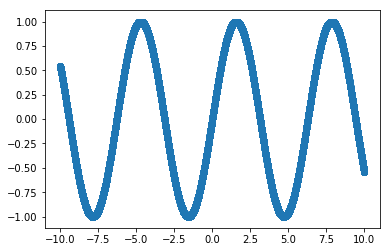

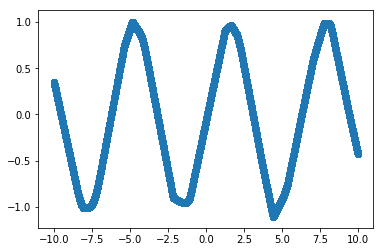

Mean Squared Error: 0.004504095043731389


In [9]:
# Continuous function
f_c = lambda x: np.sin(x)
f_c = np.vectorize(f_c)

x_c = np.random.uniform(low=-10, high=10, size=(100000,))[:,np.newaxis]
y_c = f_c(x_c)

# transform to [0~1] scale
scale_x = MinMaxScaler()
x_c = scale_x.fit_transform(x_c)
scale_y = MinMaxScaler()
y_c = scale_y.fit_transform(y_c)

neurons = 100
layers = 2
act_function = 'relu'

model = ANN_regresion(x_c, y_c, 1,
                      neurons=neurons,
                      layers=layers,
                      activation=act_function,
                      epochs=25,
                      batch_size=128,
                      verbose=0)
#  Predict Train Data
y_c_hat = model.predict(x_c)

# Transform to real scale
x_c = scale_x.inverse_transform(x_c)
y_c = scale_y.inverse_transform(y_c)
y_c_hat = scale_y.inverse_transform(y_c_hat)

# Plot functions
plt.scatter(x_c, y_c)
plt.show()
plt.scatter(x_c, y_c_hat)
plt.show()

print(f'Mean Squared Error: {mean_squared_error(y_c, y_c_hat)}')

## Discontinuous Function Example

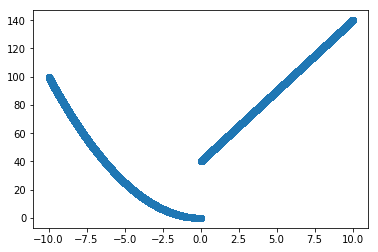

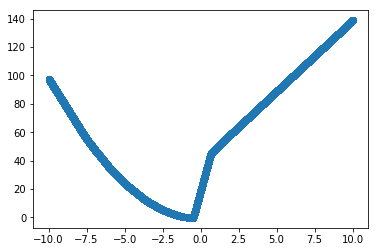

Mean Squared Error9.468372269833674


In [20]:
# Discontinuous function
f_d = lambda x: x**2 if x <0 else 40 + 10*x
f_d = np.vectorize(f_d)
x_d = np.random.uniform(low=-10, high=10, size=(100000,))[:,np.newaxis]
y_d = f_d(x_d)

# transform to [0~1] scale
scale_x = MinMaxScaler()
x_d = scale_x.fit_transform(x_d)
scale_y = MinMaxScaler()
y_d = scale_y.fit_transform(y_d)

neurons = 100
layers = 2
act_function='relu'

model = ANN_regresion(x_d, y_d, 1,
                      neurons=neurons,
                      layers=layers,
                      activation=act_function,
                      epochs=25,
                      batch_size=128,
                      verbose=0)
# Predict Train Data
y_d_hat = model.predict(x_d)

# Transform to real scale
x_d = scale_x.inverse_transform(x_d)
y_d = scale_y.inverse_transform(y_d)
y_d_hat = scale_y.inverse_transform(y_d_hat)

# Plot functions
plt.scatter(x_d, y_d)
plt.show()
plt.scatter(x_d, y_d_hat)
plt.show()
print(f'Mean Squared Error{mean_squared_error(y_d, y_d_hat)}')

#### <a id="segundo"></a>
## 2. Challenge Kaggle

Pendiente